In [1]:
%%shell

cd /content

# Install pycocotools
git clone https://github.com/cocodataset/cocoapi.git
cd cocoapi/PythonAPI
python setup.py build_ext install

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 6.64 MiB/s, done.
Resolving deltas: 100% (576/576), done.
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/pycocotools
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -I../common -I/us

In [2]:
! wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip

--2020-10-11 08:16:08--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.136.220
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.136.220|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  16.7MB/s    in 16s     

2020-10-11 08:16:25 (15.1 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]



In [3]:
!unzip annotations_trainval2017.zip

Archive:  annotations_trainval2017.zip
  inflating: annotations/instances_train2017.json  
  inflating: annotations/instances_val2017.json  
  inflating: annotations/captions_train2017.json  
  inflating: annotations/captions_val2017.json  
  inflating: annotations/person_keypoints_train2017.json  
  inflating: annotations/person_keypoints_val2017.json  


In [26]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import json
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [5]:
dataDir='/content'
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [6]:
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.52s)
creating index...
index created!


In [7]:
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
accessory appliance kitchen vehicle food electronic person animal indoor furniture sports outdoor


In [14]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['dog']);
imgIds = coco.getImgIds(catIds=catIds );
print(imgIds)
#imgIds = coco.getImgIds(imgIds = [539143])

[329219, 404484, 205834, 546829, 554002, 366611, 182805, 395801, 427034, 61471, 267300, 371749, 261161, 407083, 236592, 532530, 474164, 489014, 295478, 564280, 71226, 446522, 324158, 289343, 149568, 355905, 401991, 486479, 412240, 421455, 372819, 554579, 357459, 143961, 171611, 364636, 367195, 532575, 139872, 361571, 482917, 520301, 498286, 222317, 72813, 392818, 169076, 49269, 76417, 17029, 419974, 236166, 193162, 464522, 193674, 67213, 365207, 52891, 126110, 463522, 241326, 547502, 22192, 255664, 309938, 61108, 251572, 246454, 490171, 190140, 305343, 338624, 179392, 530624, 517832, 131273, 209613, 29393, 181969, 286422, 7386, 107226, 129756, 447200, 424162, 159458, 78565, 505573, 377575, 329447, 273642, 309484, 471789, 279278, 236784, 560880, 415990, 579321, 138492, 534270, 221693, 283412, 494869, 117525, 89880, 53529, 347930, 452891, 80153, 262938, 30494, 318238, 366884, 170278, 399655, 237864, 263463, 389933, 554291, 472375, 269113, 331075, 512836, 161609, 291664, 273232, 139099, 5

Done 1
Done 2
Done 3
Done 4
Done 5
Done 6
Done 7
Done 8
Done 9
Done 10
Done 11
Done 12
Done 13
Done 14
Done 15
Done 16
Done 17
Done 18
Done 19
Done 20
Done 21
Done 22
Done 23
Done 24
Done 25
Done 26
Done 27
Done 28
Done 29
Done 30
Done 31
Done 32
Done 33
Done 34
Done 35
Done 36
Done 37
Done 38
Done 39
Done 40
Done 41
Done 42
Done 43
Done 44
Done 45
Done 46
Done 47
Done 48
Done 49
Done 50
Done 51
Done 52
Done 53
Done 54
Done 55
Done 56
Done 57
Done 58
Done 59
Done 60
Done 61
Done 62
Done 63
Done 64
Done 65
Done 66
Done 67
Done 68
Done 69
Done 70
Done 71
Done 72
Done 73
Done 74
Done 75
Done 76
Done 77
Done 78
Done 79
Done 80
Done 81
Done 82
Done 83
Done 84
Done 85
Done 86
Done 87
Done 88
Done 89
Done 90
Done 91
Done 92
Done 93
Done 94
Done 95
Done 96
Done 97
Done 98
Done 99
Done 100
Done 101
Done 102
Done 103
Done 104
Done 105
Done 106
Done 107
Done 108
Done 109
Done 110
Done 111
Done 112
Done 113
Done 114
Done 115
Done 116
Done 117
Done 118
Done 119
Done 120
Done 121
Done 122
Done 123
D

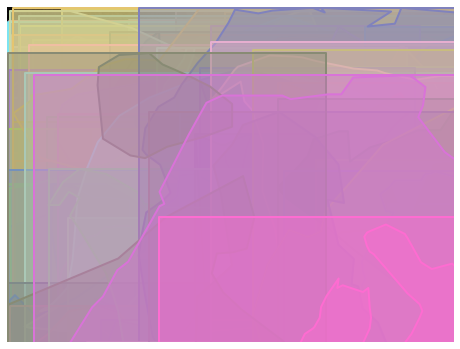

In [34]:
for temp_index in range(1, 177):
  save_path = f"/content/drive/My Drive/Course Work/Algo 2014/images/validation annotations/dog_{temp_index}.json"

  img = coco.loadImgs(imgIds[temp_index])[0]
  I = io.imread(img['coco_url'])

  plt.imshow(I); plt.axis('off')
  annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
  anns = coco.loadAnns(annIds)
  # print(anns)
  coco.showAnns(anns, draw_bbox=True)

  with open(save_path, "w") as write_file:
    json.dump(anns[0]['bbox'], write_file)

  print(f"Done {temp_index}")

[{'segmentation': [[214.43, 298.91, 224.76, 283.41, 235.1, 267.04, 247.15, 257.57, 250.6, 241.21, 249.74, 219.68, 251.46, 209.35, 250.6, 196.43, 249.74, 192.98, 229.93, 200.74, 222.18, 200.74, 216.15, 200.74, 214.43, 199.87, 214.43, 199.01, 210.12, 194.71, 205.82, 194.71, 192.04, 196.43, 180.85, 194.71, 175.68, 194.71, 173.09, 194.71, 170.51, 191.26, 168.79, 187.82, 168.79, 180.07, 176.54, 174.04, 189.46, 172.32, 197.21, 169.73, 215.29, 155.95, 222.18, 151.65, 223.9, 148.2, 223.04, 148.2, 205.82, 144.76, 201.51, 138.73, 195.48, 134.43, 191.18, 130.98, 188.6, 128.4, 185.15, 123.23, 185.15, 119.79, 185.15, 116.34, 185.15, 113.76, 185.15, 108.59, 185.15, 104.28, 191.18, 99.12, 195.48, 96.53, 203.24, 95.67, 221.32, 87.06, 232.52, 83.62, 234.24, 80.17, 235.1, 80.17, 235.1, 75.0, 235.1, 71.56, 235.1, 68.98, 240.27, 63.81, 246.29, 58.64, 247.15, 55.2, 261.79, 45.73, 272.13, 42.28, 275.57, 37.97, 279.02, 34.53, 284.19, 29.36, 291.07, 25.92, 303.99, 22.47, 311.74, 22.47, 318.63, 25.92, 332.41, 

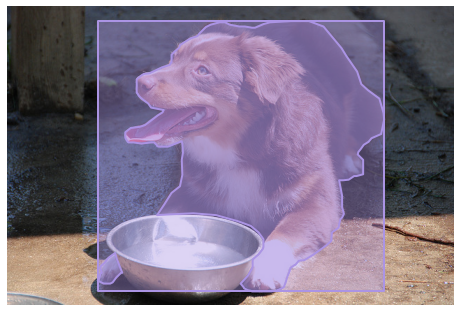

[129.18, 20.75, 410.77, 387.53]